In [1]:
import pandas as pd
import numpy as np

In [2]:
pip = pd.read_csv("~/storage/data/physicists/pip-counts-2023-04-05.csv", parse_dates=["date"], dtype={"python_version": str})
pip

,date,os,python_version,project,version,count
0,2018-06-17,Linux,3.4,awkward,0.0,1
1,2018-07-06,Linux,2.7,awkward,0.0,1
2,2018-07-08,Linux,2.7,awkward,0.0,1
3,2018-08-08,Linux,3.4,awkward,0.0,1
4,2018-08-08,Linux,3.7,awkward,0.0,1
...,...,...,...,...,...,...
181613,2023-04-05,Linux,3.9,vector,1.0,49
181614,2023-04-05,Windows,3.10,vector,1.0,1
181615,2023-04-05,Windows,3.11,vector,1.0,3
181616,2023-04-05,Windows,3.8,vector,1.0,1


# All Scikit-HEP packages

In [3]:
scikithep_sort = []
for package in [
    "iminuit",
    "pyhf",
    "uproot",
    "awkward",
    "mplhep",
    "vector",
    "boost-histogram",
    "hist",
    "resample",
    "hepstats",
    "pybumphunter",
    "fastjet",
    "numpythia",
    "decaylanguage",
    "particle",
    "hepunits",
    "pyjet",
    "probfit",
    "formulate",
    "cabinetry",
    "uhi",
    "aghast",
    "uproot-methods",
    "root-numpy",
    "root-pandas",
    "pyhepmc",
    "vegascope",
    "histbook",
    "rootpy",
    "zfit",
    "histoprint",
    "goofit",
    "reana",
    "coffea",
    "hepaccelerate",
    "fast-carpenter",
    "pylhe",
]:
    scikithep_sort.append((package, pip["count"][pip["project"] == package].sum()))

In [4]:
scikithep_sort.sort(key=lambda x: x[1])

In [5]:
ascending = [x[0] for x in scikithep_sort]

In [6]:
all_scikiheps = {}
last = None
for package in ascending:
    thisone = pip[["date", "count"]][pip["project"] == package].set_index("date").resample("10D", origin=pd.to_datetime("2020-07-24")).sum()
    # thisone.name = package
    if last is not None:
        # pair = pd.merge(thisone, last, left_index=True, right_index=True, how="outer").fillna(0)
        # thisone = pair["count_x"] + pair["count_y"]
        index = thisone.index.union(last.index)
        thisone = thisone.reindex(index, fill_value=0)
        last = last.reindex(index, fill_value=0)
        thisone = thisone + last
    all_scikiheps[package] = thisone
    last = thisone

for package in ascending:
    all_scikiheps[package] = all_scikiheps[package].reindex(last.index, fill_value=0)
    if isinstance(all_scikiheps[package], pd.DataFrame):
        all_scikiheps[package] = all_scikiheps[package]["count"]

In [7]:
all_scikiheps = pd.DataFrame(all_scikiheps, index=last.index)

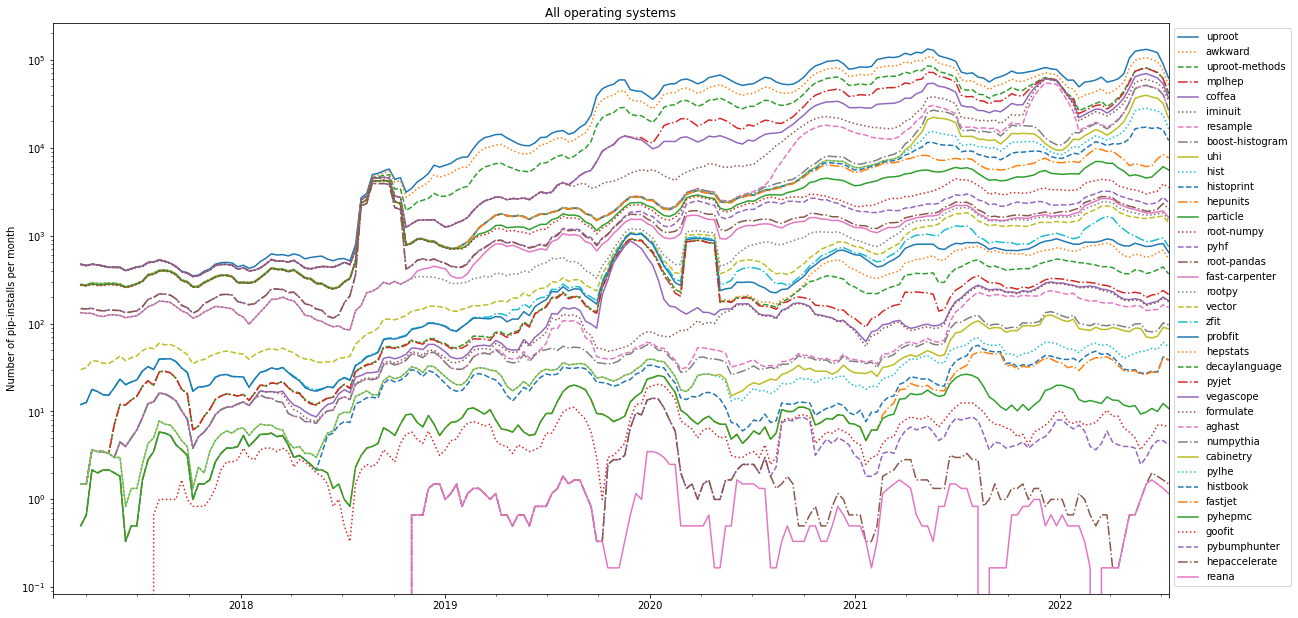

In [8]:
ax = all_scikiheps[ascending[::-1]].rolling(6).mean().plot(logy=True, style=["-", ":", "--", "-."] * 10, figsize=(20, 10.5))
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs per month")
ax.set_title("All operating systems")
ax.get_figure().savefig("PLOTS/pip-allos-scikithep-log.svg")
ax.get_figure().savefig("PLOTS/pip-allos-scikithep-log.pdf")

In [9]:
pip2 = pip[(pip["os"] == "Darwin") | (pip["os"] == "Windows")]

In [10]:
scikithep_sort = []
for package in [
    "iminuit",
    "pyhf",
    "uproot",
    "awkward",
    "mplhep",
    "vector",
    "boost-histogram",
    "hist",
    "resample",
    "hepstats",
    "pybumphunter",
    "fastjet",
    "numpythia",
    "decaylanguage",
    "particle",
    "hepunits",
    "pyjet",
    "probfit",
    "formulate",
    "cabinetry",
    "uhi",
    "aghast",
    "uproot-methods",
    "root-numpy",
    "root-pandas",
    "pyhepmc",
    "vegascope",
    "histbook",
    "rootpy",
    "zfit",
    "histoprint",
    "goofit",
    "reana",
    "coffea",
    "hepaccelerate",
    "fast-carpenter",
    "pylhe",
]:
    scikithep_sort.append((package, pip2["count"][pip2["project"] == package].sum()))

In [11]:
scikithep_sort.sort(key=lambda x: x[1])

In [12]:
ascending = [x[0] for x in scikithep_sort]

In [13]:
all_scikiheps = {}
last = None
for package in ascending:
    thisone = pip2[["date", "count"]][pip2["project"] == package].set_index("date").resample("10D", origin=pd.to_datetime("2020-07-24")).sum()
    # thisone.name = package
    if last is not None:
        # pair = pd.merge(thisone, last, left_index=True, right_index=True, how="outer").fillna(0)
        # thisone = pair["count_x"] + pair["count_y"]
        index = thisone.index.union(last.index)
        thisone = thisone.reindex(index, fill_value=0)
        last = last.reindex(index, fill_value=0)
        thisone = thisone + last
    all_scikiheps[package] = thisone
    last = thisone

for package in ascending:
    all_scikiheps[package] = all_scikiheps[package].reindex(last.index, fill_value=0)
    if isinstance(all_scikiheps[package], pd.DataFrame):
        all_scikiheps[package] = all_scikiheps[package]["count"]

In [14]:
all_scikiheps = pd.DataFrame(all_scikiheps, index=last.index)

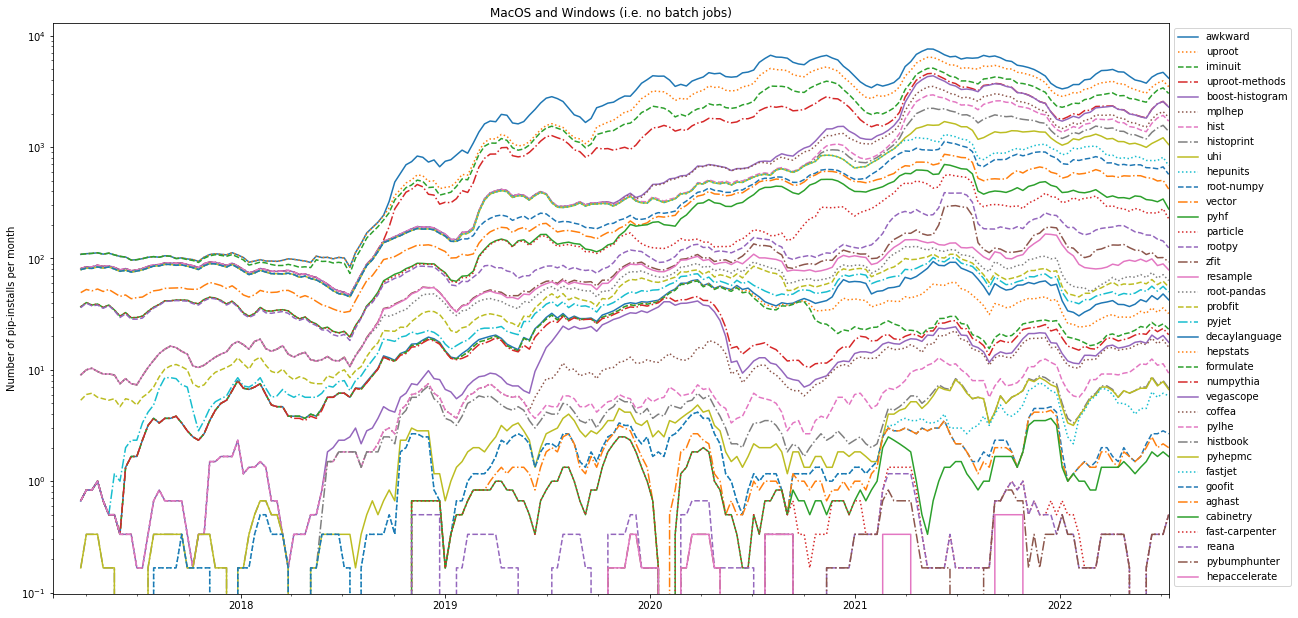

In [15]:
ax = all_scikiheps[ascending[::-1]].rolling(6).mean().plot(logy=True, style=["-", ":", "--", "-."] * 10, figsize=(20, 10.5))
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs per month")
ax.set_title("MacOS and Windows (i.e. no batch jobs)")
ax.get_figure().savefig("PLOTS/pip-macwin-scikithep-log.svg")
ax.get_figure().savefig("PLOTS/pip-macwin-scikithep-log.pdf")

# Uproot and Awkward versions

In [3]:
uproot1 = pip[(pip["project"] == "uproot") & (pip["version"].str[0:2] == "1.")].copy()
uproot2 = pip[(pip["project"] == "uproot") & (pip["version"].str[0:2] == "2.")].copy()
uproot3 = pip[((pip["project"] == "uproot") & (pip["version"].str[0:2] == "3.")) | ((pip["project"] == "uproot3") & (pip["version"].str[0:2] == "3."))].copy()
uproot4 = pip[((pip["project"] == "uproot") & (pip["version"].str[0:2] == "4.")) | ((pip["project"] == "uproot4") & (pip["version"].str[0:2] == "0."))].copy()
uproot5 = pip[(pip["project"] == "uproot") & (pip["version"].str[0:2] == "5.")].copy()
uproot_total = pip[(pip["project"] == "uproot") | (pip["project"] == "uproot3") | ((pip["project"] == "uproot4") & (pip["version"].str[0:2] == "0."))].copy()

uproot1["project"] = "Uproot 1.x"
uproot2["project"] = "Uproot 2.x"
uproot3["project"] = "Uproot 3.x"
uproot4["project"] = "Uproot 4.x"
uproot5["project"] = "Uproot 5.x"
uproot_total["project"] = "Uproot (all versions)"

In [4]:
awkward0 = pip[((pip["project"] == "awkward") & (pip["version"].str[0:2] == "0.")) | ((pip["project"] == "awkward0") & (pip["version"].str[0:2] == "0."))].copy()
awkward1 = pip[((pip["project"] == "awkward") & (pip["version"].str[0:2] == "1.")) | ((pip["project"] == "awkward1") & (pip["version"].str[0:2] == "0."))].copy()
awkward2 = pip[(pip["project"] == "awkward") & (pip["version"].str[0:2] == "2.")].copy()
awkward_total = pip[(pip["project"] == "awkward") | (pip["project"] == "awkward0") | ((pip["project"] == "awkward1") & (pip["version"].str[0:2] == "0."))].copy()

awkward0["project"] = "Awkward 0.x"
awkward1["project"] = "Awkward 1.x"
awkward2["project"] = "Awkward 2.x"
awkward_total["project"] = "Awkward (all versions)"

In [5]:
coffea06 = pip[((pip["project"] == "coffea") & (pip["version"] == "0.6"))].copy()
coffea07 = pip[((pip["project"] == "coffea") & (pip["version"] == "0.7"))].copy()
coffea08 = pip[((pip["project"] == "coffea") & (pip["version"] == "0.8"))].copy()
coffea_total = pip[((pip["project"] == "coffea"))].copy()

coffea06["project"] = "Coffea 0.6.x"
coffea07["project"] = "Coffea 0.7.x"
coffea08["project"] = "Coffea 0.8.x"
coffea_total["project"] = "Coffea (all versions)"

In [6]:
pip = pd.concat([pip, uproot1, uproot2, uproot3, uproot4, uproot5, uproot_total, awkward0, awkward1, awkward2, awkward_total, coffea06, coffea07, coffea08, coffea_total])

# Python version of Uproot users

In [7]:
pip_bypyversion = pip.set_index(["python_version", "date"])
pip_bypyversion = pip_bypyversion[pip_bypyversion["project"] == "Uproot (all versions)"][["count"]]
pip_bypyversion

count
python_version date             
3.4            2017-11-04      2
2.6            2017-12-02      1
3.4            2018-01-20      2
3.6            2018-09-23      1
2.7            2018-12-07      2
...                          ...
3.9            2023-02-20      5
               2023-02-21      1
               2023-02-21      1
3.10           2023-02-22      2
               2023-02-26      2

[51316 rows x 1 columns]

In [8]:
pythons = pip_bypyversion.index.levels[0].tolist()
by_python = {}
for python in ["3.12", "3.11", "3.10", "3.9", "3.8", "3.7", "3.6", "3.5", "3.4", "3.3", "2.7", "2.6"]:
    tmp = pip_bypyversion.loc[python]
    by_python[python] = tmp.resample("10D", origin=pd.to_datetime("2020-07-24"))["count"].sum()
all_pythons = pd.DataFrame(by_python, index=by_python["3.8"].index).fillna(0)

In [9]:
all_pythons["3.3, 3.4, 3.5"] = all_pythons["3.3"] + all_pythons["3.4"] + all_pythons["3.5"]

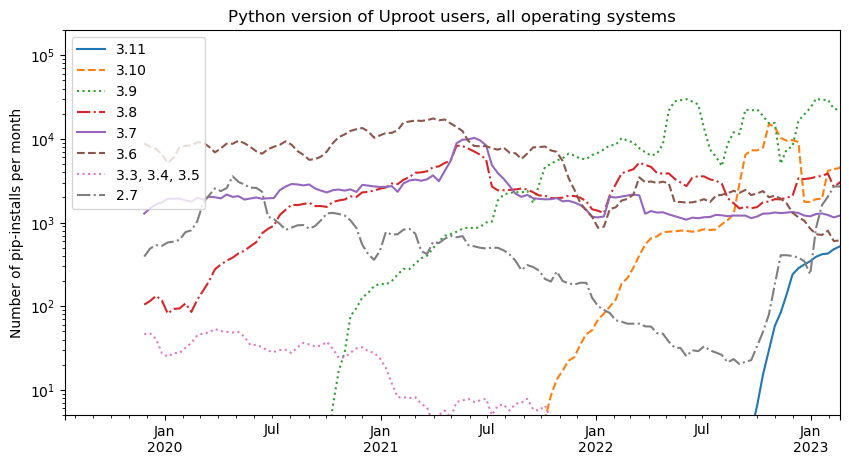

In [10]:
ax = all_pythons[[
    "3.11", "3.10", "3.9", "3.8", "3.7", "3.6", "3.3, 3.4, 3.5", "2.7"
]].rolling(6).mean().plot(logy=True, style=["-", "--", ":", "-.", "-", "--", ":", "-."], figsize=(10, 5))
ax.set_ylim(5, 200000)
ax.set_xlim(pd.to_datetime("2019-07-15"), all_pythons.index[-5])
ax.legend(loc="upper left")
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs per month")
ax.set_title("Python version of Uproot users, all operating systems")
ax.get_figure().savefig("PLOTS/pip-allos-pythonversion-uprootusers-log.svg")
ax.get_figure().savefig("PLOTS/pip-allos-pythonversion-uprootusers-log.pdf")

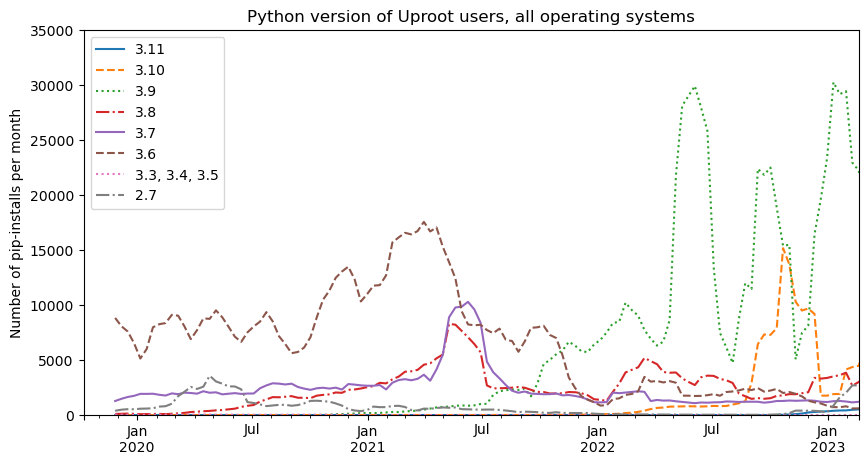

In [11]:
ax = all_pythons[[
    "3.11", "3.10", "3.9", "3.8", "3.7", "3.6", "3.3, 3.4, 3.5", "2.7"
]].rolling(6).mean().plot(logy=False, style=["-", "--", ":", "-.", "-", "--", ":", "-."], figsize=(10, 5))
ax.set_ylim(0, 35000)
ax.set_xlim(all_pythons.index[0], all_pythons.index[-5])
ax.legend(loc="upper left")
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs per month")
ax.set_title("Python version of Uproot users, all operating systems")
ax.get_figure().savefig("PLOTS/pip-allos-pythonversion-uprootusers-lin.svg")
ax.get_figure().savefig("PLOTS/pip-allos-pythonversion-uprootusers-lin.pdf")

In [12]:
pip_bypyversion = pip.set_index(["python_version", "date"])
pip_bypyversion = pip_bypyversion[(pip_bypyversion["os"] == "Darwin") | (pip_bypyversion["os"] == "Windows")]
pip_bypyversion = pip_bypyversion[pip_bypyversion["project"] == "Uproot (all versions)"][["count"]]
pip_bypyversion

count
python_version date             
3.8            2020-12-10      1
3.6            2017-11-06      1
2.7            2017-11-09      1
               2017-11-14      2
3.8            2020-12-10      1
...                          ...
               2023-02-15      2
3.9            2023-02-15      4
               2023-02-16      1
               2023-02-20      5
               2023-02-21      1

[21619 rows x 1 columns]

In [13]:
pythons = pip_bypyversion.index.levels[0].tolist()
by_python = {}
for python in ["3.11", "3.10", "3.9", "3.8", "3.7", "3.6", "3.5", "3.4", "2.7"]:
    tmp = pip_bypyversion.loc[python]
    by_python[python] = tmp.resample("10D", origin=pd.to_datetime("2020-07-24"))["count"].sum()
all_pythons = pd.DataFrame(by_python, index=by_python["3.8"].index).fillna(0)

In [14]:
all_pythons["3.3, 3.4, 3.5"] = all_pythons["3.4"] + all_pythons["3.5"]

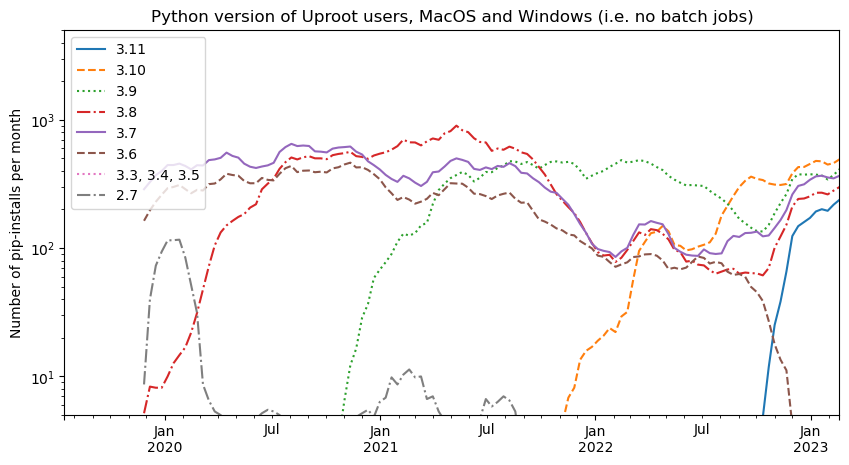

In [15]:
ax = all_pythons[[
    "3.11", "3.10", "3.9", "3.8", "3.7", "3.6", "3.3, 3.4, 3.5", "2.7"
]].rolling(6).mean().plot(logy=True, style=["-", "--", ":", "-.", "-", "--", ":", "-."], figsize=(10, 5))
ax.set_ylim(5, 5000)
ax.set_xlim(pd.to_datetime("2019-07-15"), all_pythons.index[-5])
ax.legend(loc="upper left")
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs per month")
ax.set_title("Python version of Uproot users, MacOS and Windows (i.e. no batch jobs)")
ax.get_figure().savefig("PLOTS/pip-macwin-pythonversion-uprootusers-log.svg")
ax.get_figure().savefig("PLOTS/pip-macwin-pythonversion-uprootusers-log.pdf")

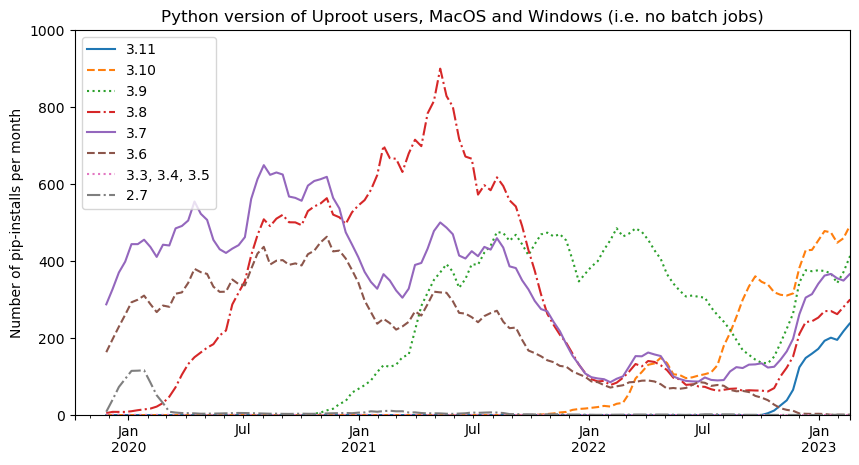

In [16]:
ax = all_pythons[[
    "3.11", "3.10", "3.9", "3.8", "3.7", "3.6", "3.3, 3.4, 3.5", "2.7"
]].rolling(6).mean().plot(logy=False, style=["-", "--", ":", "-.", "-", "--", ":", "-."], figsize=(10, 5))
ax.set_ylim(0, 1000)
ax.set_xlim(all_pythons.index[0], all_pythons.index[-5])
ax.legend(loc="upper left")
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs per month")
ax.set_title("Python version of Uproot users, MacOS and Windows (i.e. no batch jobs)")
ax.get_figure().savefig("PLOTS/pip-macwin-pythonversion-uprootusers-lin.svg")
ax.get_figure().savefig("PLOTS/pip-macwin-pythonversion-uprootusers-lin.pdf")

# Python version of NumPy users

In [30]:
pip_bypyversion = pip.set_index(["python_version", "date"])
pip_bypyversion = pip_bypyversion[pip_bypyversion["project"] == "numpy"][["count"]]
pip_bypyversion

,,count
python_version,date,
2.7,2017-04-18,1
3.8,2020-03-21,1
2.7,2017-02-01,51
3.4,2017-02-01,1
3.5,2017-02-01,3
...,...,...
3.6,2022-07-17,7
3.9,2022-07-17,8
2.7,2022-07-17,4


In [31]:
pythons = pip_bypyversion.index.levels[0].tolist()
by_python = {}
for python in ["3.11", "3.10", "3.9", "3.8", "3.7", "3.6", "3.5", "3.4", "3.3", "2.7", "2.6"]:
    tmp = pip_bypyversion.loc[python]
    by_python[python] = tmp.resample("10D", origin=pd.to_datetime("2020-07-24"))["count"].sum()
all_pythons = pd.DataFrame(by_python, index=by_python["3.8"].index).fillna(0)

In [32]:
all_pythons["3.3, 3.4, 3.5"] = all_pythons["3.3"] + all_pythons["3.4"] + all_pythons["3.5"]

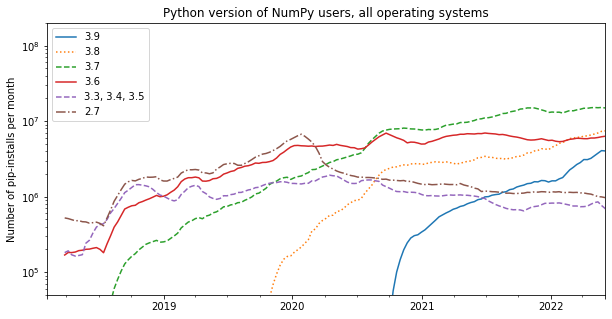

In [33]:
ax = all_pythons[[
    "3.9", "3.8", "3.7", "3.6", "3.3, 3.4, 3.5", "2.7"
]].rolling(6).mean().plot(logy=True, style=["-", ":", "--", "-", "--", "-."], figsize=(10, 5))
ax.set_ylim(50000, 200000000)
ax.set_xlim(all_pythons.index[0], all_pythons.index[-5])
ax.legend(loc="upper left")
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs per month")
ax.set_title("Python version of NumPy users, all operating systems")
ax.get_figure().savefig("PLOTS/pip-allos-pythonversion-numpyusers-log.svg")
ax.get_figure().savefig("PLOTS/pip-allos-pythonversion-numpyusers-log.pdf")

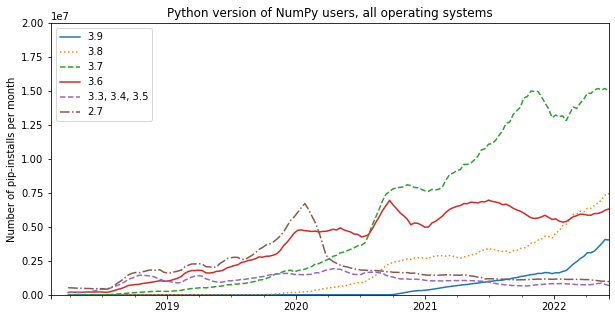

In [34]:
ax = all_pythons[[
    "3.9", "3.8", "3.7", "3.6", "3.3, 3.4, 3.5", "2.7"
]].rolling(6).mean().plot(logy=False, style=["-", ":", "--", "-", "--", "-."], figsize=(10, 5))
ax.set_ylim(0, 20000000)
ax.set_xlim(all_pythons.index[0], all_pythons.index[-5])
ax.legend(loc="upper left")
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs per month")
ax.set_title("Python version of NumPy users, all operating systems")
ax.get_figure().savefig("PLOTS/pip-allos-pythonversion-numpyusers-lin.svg")
ax.get_figure().savefig("PLOTS/pip-allos-pythonversion-numpyusers-lin.pdf")

In [35]:
pip_bypyversion = pip.set_index(["python_version", "date"])
pip_bypyversion = pip_bypyversion[(pip_bypyversion["os"] == "Darwin") | (pip_bypyversion["os"] == "Windows")]
pip_bypyversion = pip_bypyversion[pip_bypyversion["project"] == "numpy"][["count"]]
pip_bypyversion

count
python_version date             
3.8            2020-03-21      1
2.7            2017-02-01     51
3.4            2017-02-01      1
3.5            2017-02-01      3
3.6            2017-02-01      1
...                          ...
               2022-07-17      5
3.8            2022-07-17      4
2.7            2022-07-17      4
3.10           2022-07-17      9
3.8            2022-07-17      6

[263500 rows x 1 columns]

In [36]:
pythons = pip_bypyversion.index.levels[0].tolist()
by_python = {}
for python in ["3.11", "3.10", "3.9", "3.8", "3.7", "3.6", "3.5", "3.4", "2.7"]:
    tmp = pip_bypyversion.loc[python]
    by_python[python] = tmp.resample("10D", origin=pd.to_datetime("2020-07-24"))["count"].sum()
all_pythons = pd.DataFrame(by_python, index=by_python["3.8"].index).fillna(0)

In [37]:
all_pythons["3.3, 3.4, 3.5"] = all_pythons["3.4"] + all_pythons["3.5"]

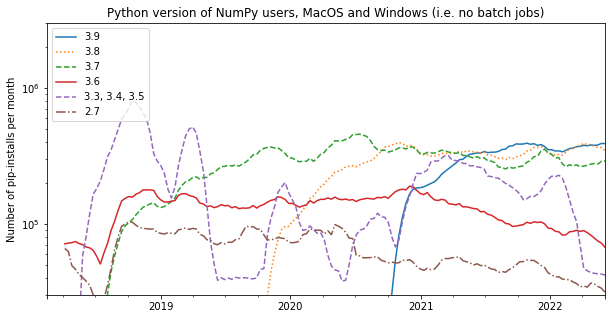

In [38]:
ax = all_pythons[[
    "3.9", "3.8", "3.7", "3.6", "3.3, 3.4, 3.5", "2.7"
]].rolling(6).mean().plot(logy=True, style=["-", ":", "--", "-", "--", "-."], figsize=(10, 5))
ax.set_ylim(30000, 3000000)
ax.set_xlim(all_pythons.index[0], all_pythons.index[-5])
ax.legend(loc="upper left")
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs per month")
ax.set_title("Python version of NumPy users, MacOS and Windows (i.e. no batch jobs)")
ax.get_figure().savefig("PLOTS/pip-macwin-pythonversion-numpyusers-log.svg")
ax.get_figure().savefig("PLOTS/pip-macwin-pythonversion-numpyusers-log.pdf")

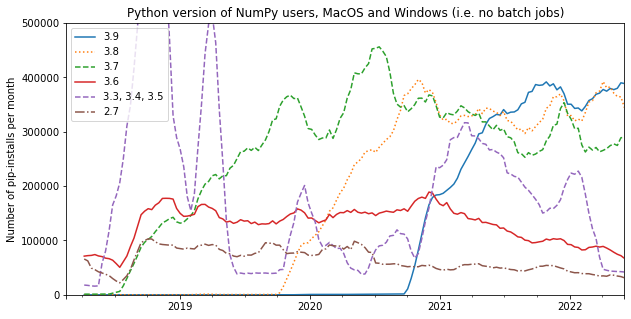

In [39]:
ax = all_pythons[[
    "3.9", "3.8", "3.7", "3.6", "3.3, 3.4, 3.5", "2.7"
]].rolling(6).mean().plot(logy=False, style=["-", ":", "--", "-", "--", "-."], figsize=(10, 5))
ax.set_ylim(0, 500000)
ax.set_xlim(all_pythons.index[0], all_pythons.index[-5])
ax.legend(loc="upper left")
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs per month")
ax.set_title("Python version of NumPy users, MacOS and Windows (i.e. no batch jobs)")
ax.get_figure().savefig("PLOTS/pip-macwin-pythonversion-numpyusers-lin.svg")
ax.get_figure().savefig("PLOTS/pip-macwin-pythonversion-numpyusers-lin.pdf")

# Uproot, Awkward, and Coffea packages

In [17]:
pip.set_index(["project", "date"], inplace=True)
pip

os python_version   version  count
project               date                                             
awkward               2018-06-17  Linux            3.4       0.0      1
                      2018-07-06  Linux            2.7       0.0      1
                      2018-07-08  Linux            2.7       0.0      1
                      2018-08-08  Linux            3.4       0.0      1
                      2018-08-08  Linux            3.7       0.0      1
...                                 ...            ...       ...    ...
Coffea (all versions) 2021-10-27  Linux            3.7  0.7.0rc1      2
                      2021-10-29  Linux            3.7  0.7.0rc1      4
                      2021-11-27  Linux            3.7  0.7.0rc1      1
                      2022-10-07  Linux            3.9  0.7.0rc1      2
                      2022-12-21  Linux            3.7  0.7.0rc1      1

[407939 rows x 4 columns]

In [18]:
packages = pip.index.levels[0].tolist()
by_package = {}
for package in packages:
    tmp = pip.loc[package]
    by_package[package] = tmp.resample("10D", origin=pd.to_datetime("2020-07-24"))["count"].sum()
all_packages = pd.DataFrame(by_package, index=by_package["uproot"].index).fillna(0)

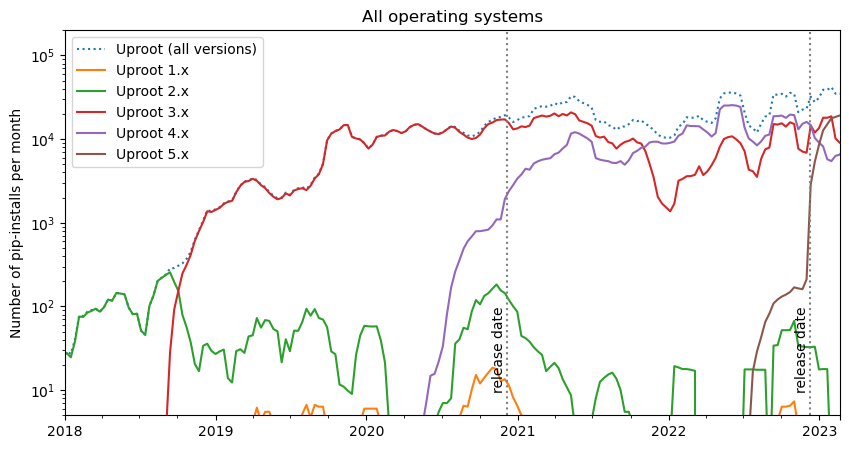

In [25]:
ax = all_packages[[
    "Uproot (all versions)", "Uproot 1.x", "Uproot 2.x", "Uproot 3.x", "Uproot 4.x", "Uproot 5.x"
]].rolling(6).mean().plot(logy=True, style=[":", "-", "-", "-", "-", "-"], figsize=(10, 5))
ax.set_ylim(5, 200000)
ax.set_xlim(pd.to_datetime("2018-01-01"), all_packages.index[-5])
ax.axvline(pd.to_datetime("2020-12-05"), ls=":", c="gray")
ax.text(pd.to_datetime("2020-12-05") - pd.to_timedelta("35 days"), 30, "release date", rotation=90, va="center")
ax.axvline(pd.to_datetime("2022-12-09"), ls=":", c="gray")
ax.text(pd.to_datetime("2022-12-09") - pd.to_timedelta("35 days"), 30, "release date", rotation=90, va="center")
ax.legend(loc="upper left")
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs per month")
ax.set_title("All operating systems")
ax.get_figure().savefig("PLOTS/pip-allos-uproot-log.svg")
ax.get_figure().savefig("PLOTS/pip-allos-uproot-log.pdf")

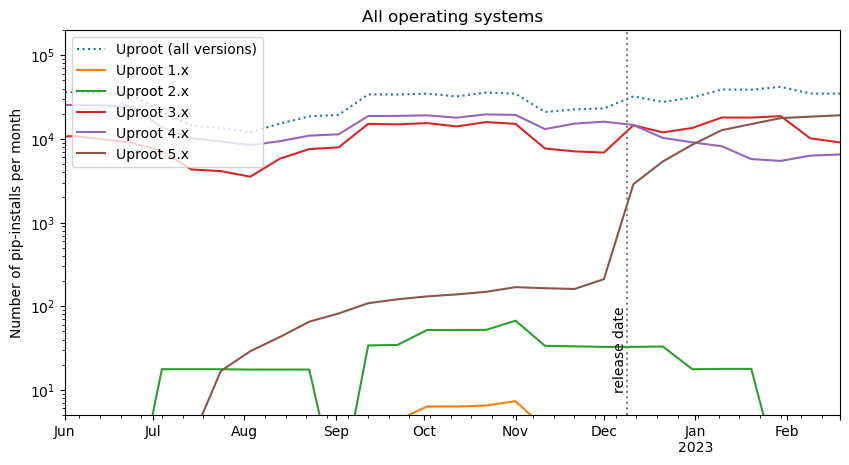

In [27]:
ax = all_packages[[
    "Uproot (all versions)", "Uproot 1.x", "Uproot 2.x", "Uproot 3.x", "Uproot 4.x", "Uproot 5.x"
]].rolling(6).mean().plot(logy=True, style=[":", "-", "-", "-", "-", "-"], figsize=(10, 5))
ax.set_ylim(5, 200000)
ax.set_xlim(pd.to_datetime("2022-06-01"), all_packages.index[-5])
ax.axvline(pd.to_datetime("2022-12-09"), ls=":", c="gray")
ax.text(pd.to_datetime("2022-12-09") - pd.to_timedelta("5 days"), 30, "release date", rotation=90, va="center")
ax.legend(loc="upper left")
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs per month")
ax.set_title("All operating systems")
ax.get_figure().savefig("PLOTS/pip-allos-uproot-log-recent.svg")
ax.get_figure().savefig("PLOTS/pip-allos-uproot-log-recent.pdf")

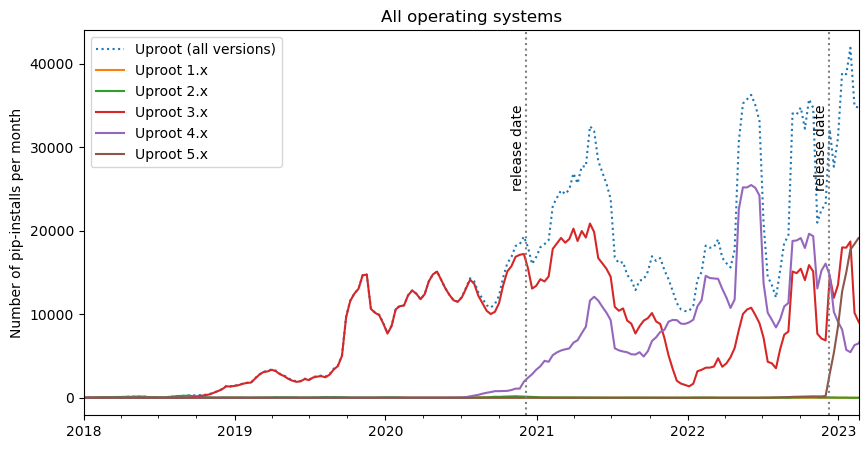

In [28]:
ax = all_packages[[
    "Uproot (all versions)", "Uproot 1.x", "Uproot 2.x", "Uproot 3.x", "Uproot 4.x", "Uproot 5.x"
]].rolling(6).mean().plot(logy=False, style=[":", "-", "-", "-", "-", "-"], figsize=(10, 5))
ax.set_xlim(pd.to_datetime("2018-01-01"), all_packages.index[-5])
ax.axvline(pd.to_datetime("2020-12-05"), ls=":", c="gray")
ax.text(pd.to_datetime("2020-12-05") - pd.to_timedelta("35 days"), 30000, "release date", rotation=90, va="center")
ax.axvline(pd.to_datetime("2022-12-09"), ls=":", c="gray")
ax.text(pd.to_datetime("2022-12-09") - pd.to_timedelta("35 days"), 30000, "release date", rotation=90, va="center")
ax.legend(loc="upper left")
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs per month")
ax.set_title("All operating systems")
ax.get_figure().savefig("PLOTS/pip-allos-uproot-lin.svg")
ax.get_figure().savefig("PLOTS/pip-allos-uproot-lin.pdf")

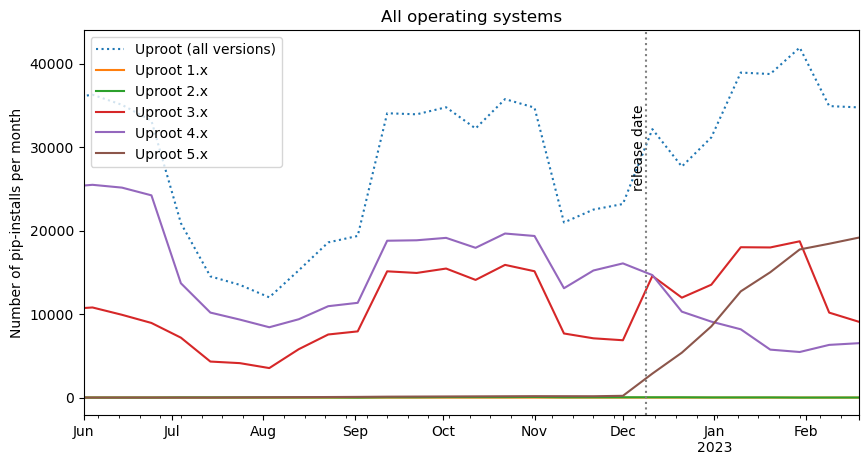

In [29]:
ax = all_packages[[
    "Uproot (all versions)", "Uproot 1.x", "Uproot 2.x", "Uproot 3.x", "Uproot 4.x", "Uproot 5.x"
]].rolling(6).mean().plot(logy=False, style=[":", "-", "-", "-", "-", "-"], figsize=(10, 5))
ax.set_xlim(pd.to_datetime("2022-06-01"), all_packages.index[-5])
ax.axvline(pd.to_datetime("2022-12-09"), ls=":", c="gray")
ax.text(pd.to_datetime("2022-12-09") - pd.to_timedelta("5 days"), 30000, "release date", rotation=90, va="center")
ax.legend(loc="upper left")
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs per month")
ax.set_title("All operating systems")
ax.get_figure().savefig("PLOTS/pip-allos-uproot-lin-recent.svg")
ax.get_figure().savefig("PLOTS/pip-allos-uproot-lin-recent.pdf")

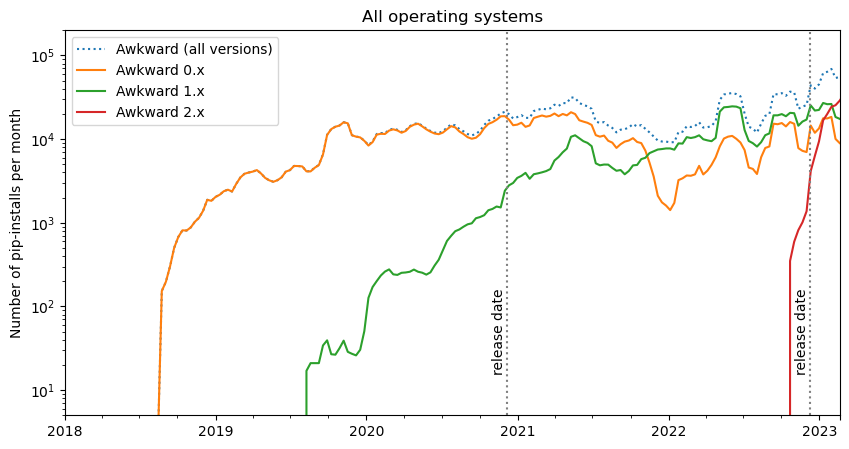

In [30]:
ax = all_packages[[
    "Awkward (all versions)", "Awkward 0.x", "Awkward 1.x", "Awkward 2.x"
]].rolling(6).mean().plot(logy=True, style=[":", "-", "-", "-"], figsize=(10, 5))
ax.set_ylim(5, 200000)
ax.set_xlim(pd.to_datetime("2018-01-01"), all_packages.index[-5])
ax.axvline(pd.to_datetime("2020-12-05"), ls=":", c="gray")
ax.text(pd.to_datetime("2020-12-05") - pd.to_timedelta("35 days"), 50, "release date", rotation=90, va="center")
ax.axvline(pd.to_datetime("2022-12-09"), ls=":", c="gray")
ax.text(pd.to_datetime("2022-12-09") - pd.to_timedelta("35 days"), 50, "release date", rotation=90, va="center")
ax.legend(loc="upper left")
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs per month")
ax.set_title("All operating systems")
ax.get_figure().savefig("PLOTS/pip-allos-awkward-log.svg")
ax.get_figure().savefig("PLOTS/pip-allos-awkward-log.pdf")

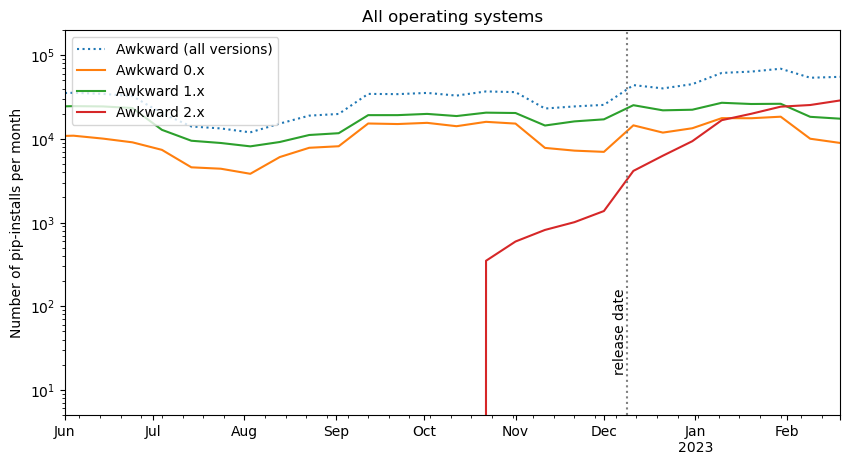

In [31]:
ax = all_packages[[
    "Awkward (all versions)", "Awkward 0.x", "Awkward 1.x", "Awkward 2.x"
]].rolling(6).mean().plot(logy=True, style=[":", "-", "-", "-"], figsize=(10, 5))
ax.set_ylim(5, 200000)
ax.set_xlim(pd.to_datetime("2022-06-01"), all_packages.index[-5])
ax.axvline(pd.to_datetime("2022-12-09"), ls=":", c="gray")
ax.text(pd.to_datetime("2022-12-09") - pd.to_timedelta("5 days"), 50, "release date", rotation=90, va="center")
ax.legend(loc="upper left")
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs per month")
ax.set_title("All operating systems")
ax.get_figure().savefig("PLOTS/pip-allos-awkward-log-recent.svg")
ax.get_figure().savefig("PLOTS/pip-allos-awkward-log-recent.pdf")

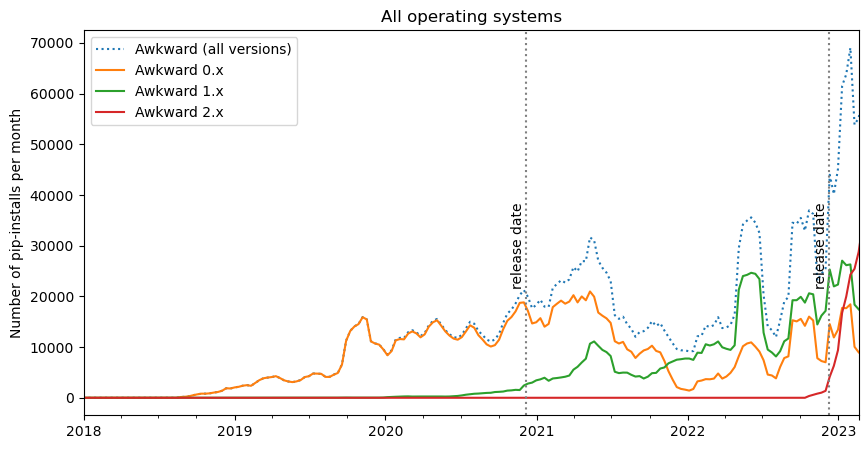

In [32]:
ax = all_packages[[
    "Awkward (all versions)", "Awkward 0.x", "Awkward 1.x", "Awkward 2.x"
]].rolling(6).mean().plot(logy=False, style=[":", "-", "-", "-"], figsize=(10, 5))
ax.set_xlim(pd.to_datetime("2018-01-01"), all_packages.index[-5])
ax.axvline(pd.to_datetime("2020-12-05"), ls=":", c="gray")
ax.text(pd.to_datetime("2020-12-05") - pd.to_timedelta("35 days"), 30000, "release date", rotation=90, va="center")
ax.axvline(pd.to_datetime("2022-12-09"), ls=":", c="gray")
ax.text(pd.to_datetime("2022-12-09") - pd.to_timedelta("35 days"), 30000, "release date", rotation=90, va="center")
ax.legend(loc="upper left")
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs per month")
ax.set_title("All operating systems")
ax.get_figure().savefig("PLOTS/pip-allos-awkward-lin.svg")
ax.get_figure().savefig("PLOTS/pip-allos-awkward-lin.pdf")

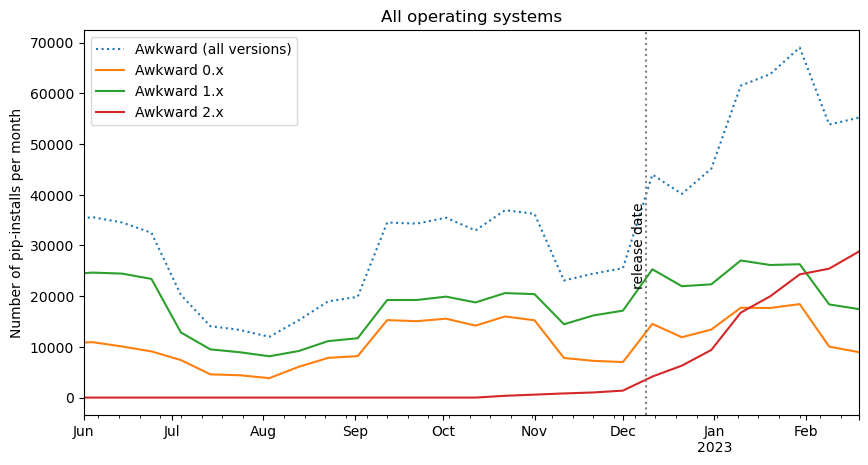

In [33]:
ax = all_packages[[
    "Awkward (all versions)", "Awkward 0.x", "Awkward 1.x", "Awkward 2.x"
]].rolling(6).mean().plot(logy=False, style=[":", "-", "-", "-"], figsize=(10, 5))
ax.set_xlim(pd.to_datetime("2022-06-01"), all_packages.index[-5])
ax.axvline(pd.to_datetime("2022-12-09"), ls=":", c="gray")
ax.text(pd.to_datetime("2022-12-09") - pd.to_timedelta("5 days"), 30000, "release date", rotation=90, va="center")
ax.legend(loc="upper left")
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs per month")
ax.set_title("All operating systems")
ax.get_figure().savefig("PLOTS/pip-allos-awkward-lin-recent.svg")
ax.get_figure().savefig("PLOTS/pip-allos-awkward-lin-recent.pdf")

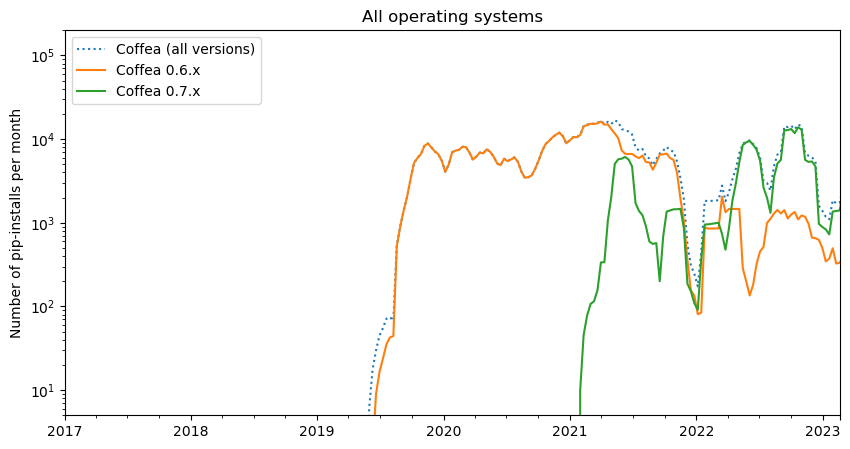

In [23]:
ax = all_packages[[
    "Coffea (all versions)", "Coffea 0.6.x", "Coffea 0.7.x"
]].rolling(6).mean().plot(logy=True, style=[":", "-", "-", "-"], figsize=(10, 5))
ax.set_ylim(5, 200000)
ax.set_xlim(pd.to_datetime("2017-01-01"), all_packages.index[-5])
ax.legend(loc="upper left")
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs per month")
ax.set_title("All operating systems")
ax.get_figure().savefig("PLOTS/pip-allos-coffea-log.svg")
ax.get_figure().savefig("PLOTS/pip-allos-coffea-log.pdf")

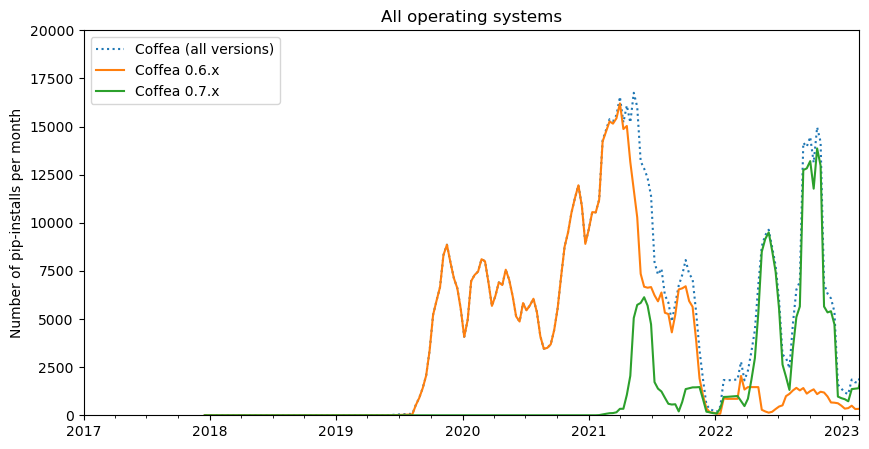

In [24]:
ax = all_packages[[
    "Coffea (all versions)", "Coffea 0.6.x", "Coffea 0.7.x",
]].rolling(6).mean().plot(logy=False, style=[":", "-", "-"], figsize=(10, 5))
ax.set_ylim(0, 20000)
ax.set_xlim(pd.to_datetime("2017-01-01"), all_packages.index[-5])
ax.legend(loc="upper left")
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs per month")
ax.set_title("All operating systems")
ax.get_figure().savefig("PLOTS/pip-allos-coffea-lin.svg")
ax.get_figure().savefig("PLOTS/pip-allos-coffea-lin.pdf")

In [34]:
all_packages_allos = all_packages

In [35]:
pip = pip[(pip["os"] == "Darwin") | (pip["os"] == "Windows")]

In [36]:
packages = pip.index.levels[0].tolist()
by_package = {}
for package in packages:
    tmp = pip.loc[package]
    by_package[package] = tmp.resample("10D", origin=pd.to_datetime("2020-07-24"))["count"].sum()
all_packages = pd.DataFrame(by_package, index=by_package["uproot"].index).fillna(0)

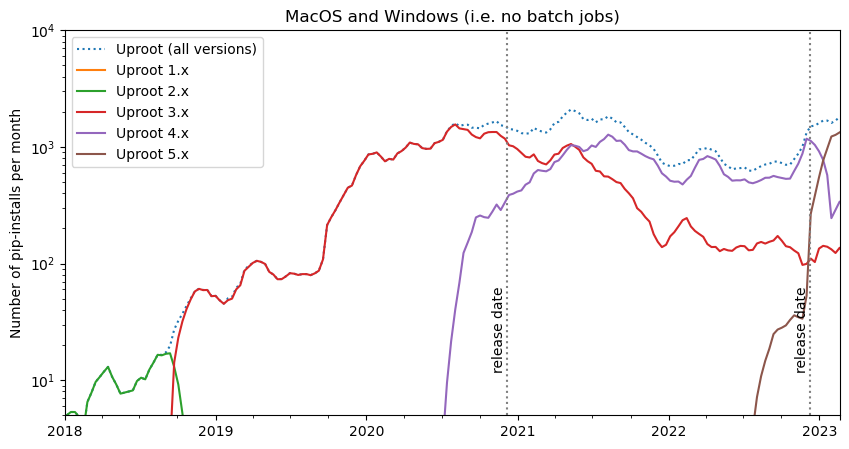

In [37]:
ax = all_packages[[
    "Uproot (all versions)", "Uproot 1.x", "Uproot 2.x", "Uproot 3.x", "Uproot 4.x", "Uproot 5.x"
]].rolling(6).mean().plot(logy=True, style=[":", "-", "-", "-", "-", "-"], figsize=(10, 5))
ax.set_ylim(5, 10000)
ax.set_xlim(pd.to_datetime("2018-01-01"), all_packages.index[-5])
ax.axvline(pd.to_datetime("2020-12-05"), ls=":", c="gray")
ax.text(pd.to_datetime("2020-12-05") - pd.to_timedelta("35 days"), 27, "release date", rotation=90, va="center")
ax.axvline(pd.to_datetime("2022-12-09"), ls=":", c="gray")
ax.text(pd.to_datetime("2022-12-09") - pd.to_timedelta("35 days"), 27, "release date", rotation=90, va="center")
ax.legend(loc="upper left")
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs per month")
ax.set_title("MacOS and Windows (i.e. no batch jobs)")
ax.get_figure().savefig("PLOTS/pip-macwin-uproot-log.svg")
ax.get_figure().savefig("PLOTS/pip-macwin-uproot-log.pdf")

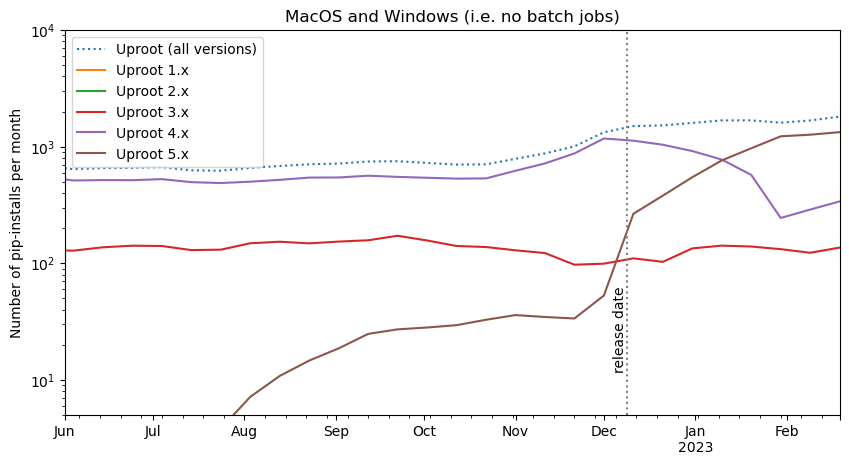

In [38]:
ax = all_packages[[
    "Uproot (all versions)", "Uproot 1.x", "Uproot 2.x", "Uproot 3.x", "Uproot 4.x", "Uproot 5.x"
]].rolling(6).mean().plot(logy=True, style=[":", "-", "-", "-", "-", "-"], figsize=(10, 5))
ax.set_ylim(5, 10000)
ax.set_xlim(pd.to_datetime("2022-06-01"), all_packages.index[-5])
ax.axvline(pd.to_datetime("2022-12-09"), ls=":", c="gray")
ax.text(pd.to_datetime("2022-12-09") - pd.to_timedelta("5 days"), 27, "release date", rotation=90, va="center")
ax.legend(loc="upper left")
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs per month")
ax.set_title("MacOS and Windows (i.e. no batch jobs)")
ax.get_figure().savefig("PLOTS/pip-macwin-uproot-log-recent.svg")
ax.get_figure().savefig("PLOTS/pip-macwin-uproot-log-recent.pdf")

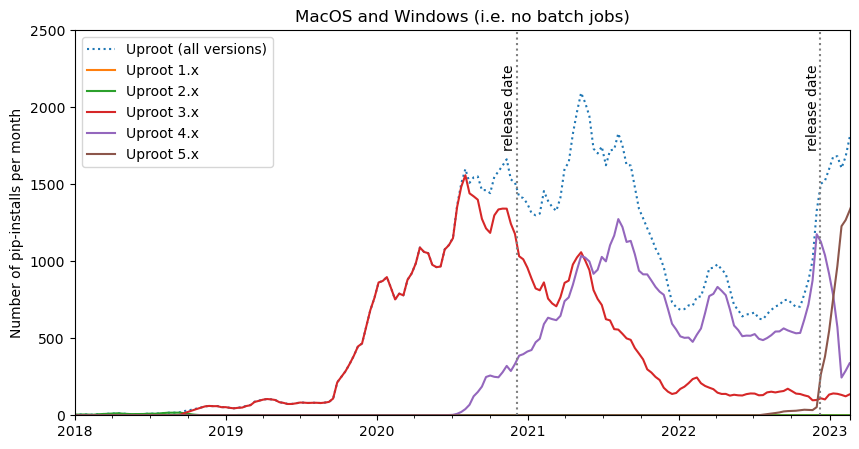

In [39]:
ax = all_packages[[
    "Uproot (all versions)", "Uproot 1.x", "Uproot 2.x", "Uproot 3.x", "Uproot 4.x", "Uproot 5.x"
]].rolling(6).mean().plot(logy=False, style=[":", "-", "-", "-", "-", "-"], figsize=(10, 5))
ax.set_ylim(0, 2500)
ax.set_xlim(pd.to_datetime("2018-01-01"), all_packages.index[-5])
ax.axvline(pd.to_datetime("2020-12-05"), ls=":", c="gray")
ax.text(pd.to_datetime("2020-12-05") - pd.to_timedelta("35 days"), 2000, "release date", rotation=90, va="center")
ax.axvline(pd.to_datetime("2022-12-09"), ls=":", c="gray")
ax.text(pd.to_datetime("2022-12-09") - pd.to_timedelta("35 days"), 2000, "release date", rotation=90, va="center")
ax.legend(loc="upper left")
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs per month")
ax.set_title("MacOS and Windows (i.e. no batch jobs)")
ax.get_figure().savefig("PLOTS/pip-macwin-uproot-lin.svg")
ax.get_figure().savefig("PLOTS/pip-macwin-uproot-lin.pdf")

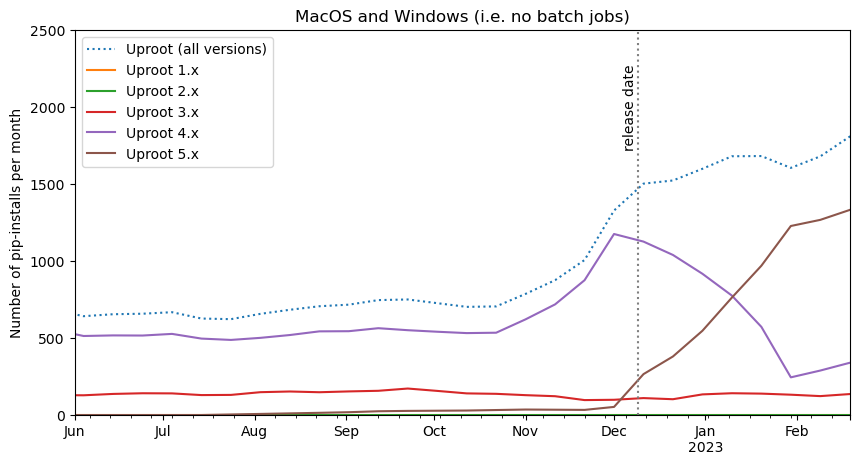

In [40]:
ax = all_packages[[
    "Uproot (all versions)", "Uproot 1.x", "Uproot 2.x", "Uproot 3.x", "Uproot 4.x", "Uproot 5.x"
]].rolling(6).mean().plot(logy=False, style=[":", "-", "-", "-", "-", "-"], figsize=(10, 5))
ax.set_ylim(0, 2500)
ax.set_xlim(pd.to_datetime("2022-06-01"), all_packages.index[-5])
ax.axvline(pd.to_datetime("2022-12-09"), ls=":", c="gray")
ax.text(pd.to_datetime("2022-12-09") - pd.to_timedelta("5 days"), 2000, "release date", rotation=90, va="center")
ax.legend(loc="upper left")
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs per month")
ax.set_title("MacOS and Windows (i.e. no batch jobs)")
ax.get_figure().savefig("PLOTS/pip-macwin-uproot-lin-recent.svg")
ax.get_figure().savefig("PLOTS/pip-macwin-uproot-lin-recent.pdf")

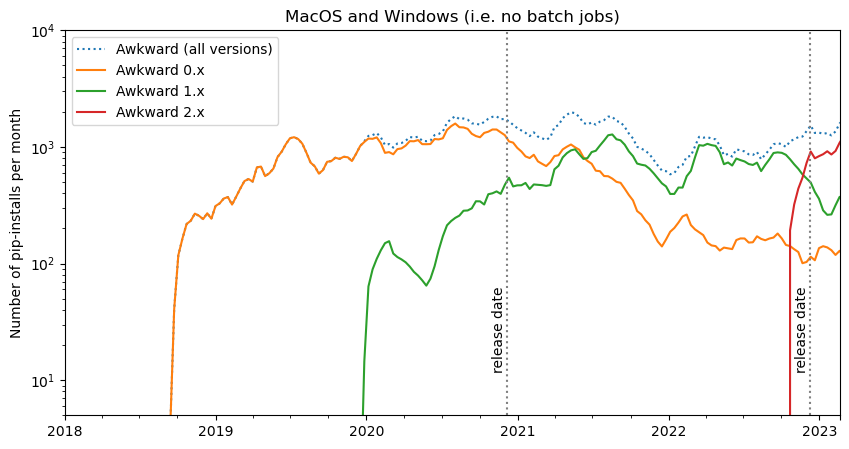

In [41]:
ax = all_packages[[
    "Awkward (all versions)", "Awkward 0.x", "Awkward 1.x", "Awkward 2.x"
]].rolling(6).mean().plot(logy=True, style=[":", "-", "-", "-"], figsize=(10, 5))
ax.set_ylim(5, 10000)
ax.set_xlim(pd.to_datetime("2018-01-01"), all_packages.index[-5])
ax.legend(loc="upper left")
ax.axvline(pd.to_datetime("2020-12-05"), ls=":", c="gray")
ax.text(pd.to_datetime("2020-12-05") - pd.to_timedelta("35 days"), 27, "release date", rotation=90, va="center")
ax.axvline(pd.to_datetime("2022-12-09"), ls=":", c="gray")
ax.text(pd.to_datetime("2022-12-09") - pd.to_timedelta("35 days"), 27, "release date", rotation=90, va="center")
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs per month")
ax.set_title("MacOS and Windows (i.e. no batch jobs)")
ax.get_figure().savefig("PLOTS/pip-macwin-awkward-log.svg")
ax.get_figure().savefig("PLOTS/pip-macwin-awkward-log.pdf")

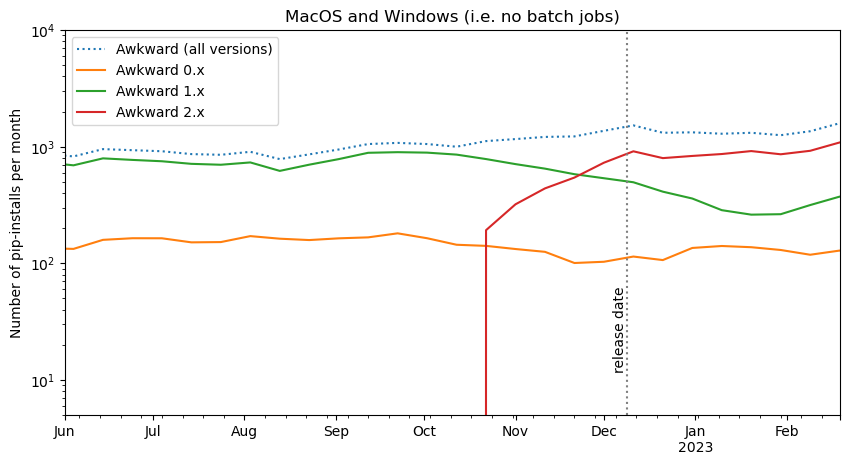

In [43]:
ax = all_packages[[
    "Awkward (all versions)", "Awkward 0.x", "Awkward 1.x", "Awkward 2.x"
]].rolling(6).mean().plot(logy=True, style=[":", "-", "-", "-"], figsize=(10, 5))
ax.set_ylim(5, 10000)
ax.set_xlim(pd.to_datetime("2022-06-01"), all_packages.index[-5])
ax.legend(loc="upper left")
ax.axvline(pd.to_datetime("2022-12-09"), ls=":", c="gray")
ax.text(pd.to_datetime("2022-12-09") - pd.to_timedelta("5 days"), 27, "release date", rotation=90, va="center")
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs per month")
ax.set_title("MacOS and Windows (i.e. no batch jobs)")
ax.get_figure().savefig("PLOTS/pip-macwin-awkward-log-recent.svg")
ax.get_figure().savefig("PLOTS/pip-macwin-awkward-log-recent.pdf")

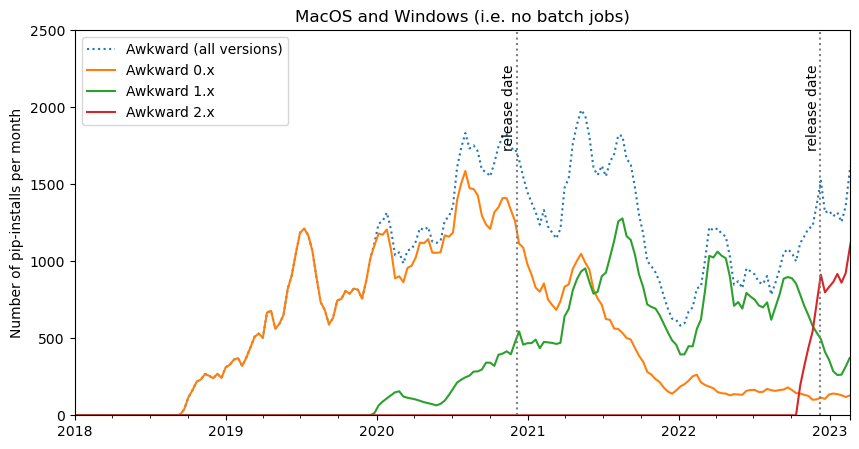

In [44]:
ax = all_packages[[
    "Awkward (all versions)", "Awkward 0.x", "Awkward 1.x", "Awkward 2.x"
]].rolling(6).mean().plot(logy=False, style=[":", "-", "-", "-"], figsize=(10, 5))
ax.set_ylim(0, 2500)
ax.set_xlim(pd.to_datetime("2018-01-01"), all_packages.index[-5])
ax.legend(loc="upper left")
ax.axvline(pd.to_datetime("2020-12-05"), ls=":", c="gray")
ax.text(pd.to_datetime("2020-12-05") - pd.to_timedelta("35 days"), 2000, "release date", rotation=90, va="center")
ax.axvline(pd.to_datetime("2022-12-09"), ls=":", c="gray")
ax.text(pd.to_datetime("2022-12-09") - pd.to_timedelta("35 days"), 2000, "release date", rotation=90, va="center")
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs per month")
ax.set_title("MacOS and Windows (i.e. no batch jobs)")
ax.get_figure().savefig("PLOTS/pip-macwin-awkward-lin.svg")
ax.get_figure().savefig("PLOTS/pip-macwin-awkward-lin.pdf")

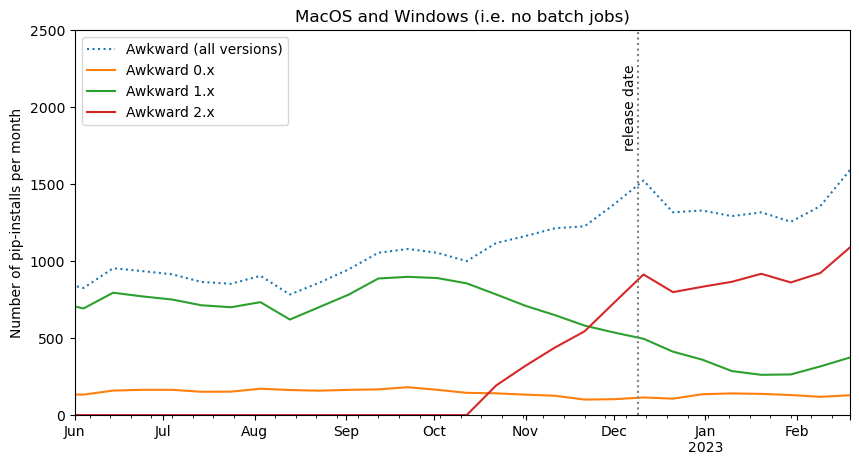

In [45]:
ax = all_packages[[
    "Awkward (all versions)", "Awkward 0.x", "Awkward 1.x", "Awkward 2.x"
]].rolling(6).mean().plot(logy=False, style=[":", "-", "-", "-"], figsize=(10, 5))
ax.set_ylim(0, 2500)
ax.set_xlim(pd.to_datetime("2022-06-01"), all_packages.index[-5])
ax.legend(loc="upper left")
ax.axvline(pd.to_datetime("2022-12-09"), ls=":", c="gray")
ax.text(pd.to_datetime("2022-12-09") - pd.to_timedelta("5 days"), 2000, "release date", rotation=90, va="center")
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs per month")
ax.set_title("MacOS and Windows (i.e. no batch jobs)")
ax.get_figure().savefig("PLOTS/pip-macwin-awkward-lin-recent.svg")
ax.get_figure().savefig("PLOTS/pip-macwin-awkward-lin-recent.pdf")

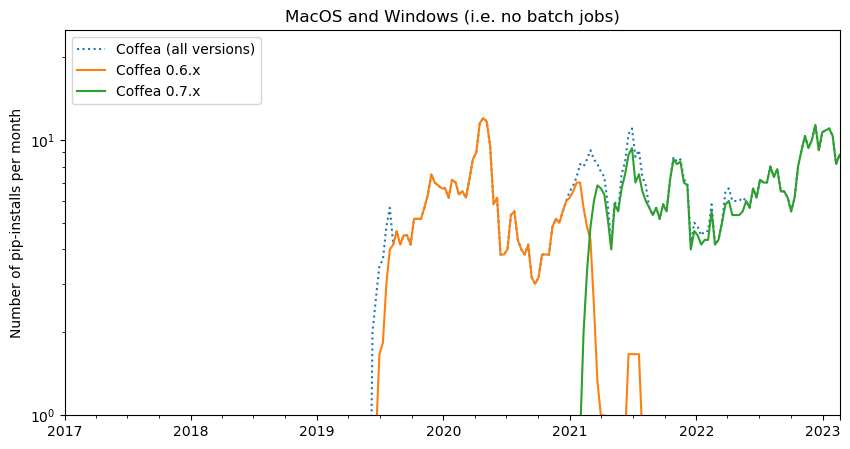

In [46]:
ax = all_packages[[
    "Coffea (all versions)", "Coffea 0.6.x", "Coffea 0.7.x",
]].rolling(6).mean().plot(logy=True, style=[":", "-", "-"], figsize=(10, 5))
ax.set_ylim(1, 25)
ax.set_xlim(pd.to_datetime("2017-01-01"), all_packages.index[-5])
ax.legend(loc="upper left")
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs per month")
ax.set_title("MacOS and Windows (i.e. no batch jobs)")
ax.get_figure().savefig("PLOTS/pip-macwin-coffea-log.svg")
ax.get_figure().savefig("PLOTS/pip-macwin-coffea-log.pdf")

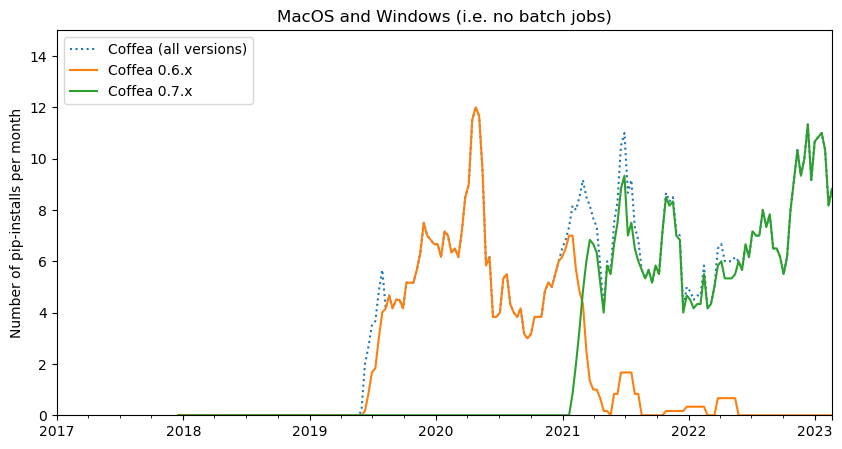

In [47]:
ax = all_packages[[
    "Coffea (all versions)", "Coffea 0.6.x", "Coffea 0.7.x",
]].rolling(6).mean().plot(logy=False, style=[":", "-", "-"], figsize=(10, 5))
ax.set_ylim(0, 15)
ax.set_xlim(pd.to_datetime("2017-01-01"), all_packages.index[-5])
ax.legend(loc="upper left")
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs per month")
ax.set_title("MacOS and Windows (i.e. no batch jobs)")
ax.get_figure().savefig("PLOTS/pip-macwin-coffea-lin.svg")
ax.get_figure().savefig("PLOTS/pip-macwin-coffea-lin.pdf")

### Some more plots

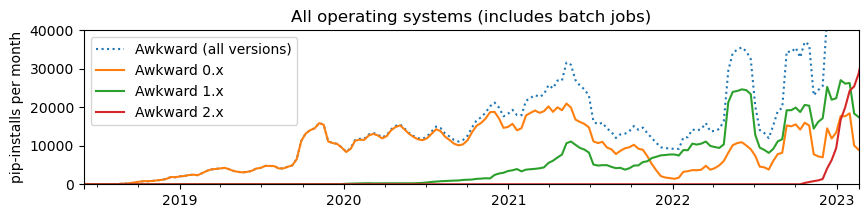

In [48]:
ax = all_packages_allos[[
    "Awkward (all versions)", "Awkward 0.x", "Awkward 1.x", "Awkward 2.x"
]].rolling(6).mean().plot(logy=False, style=[":", "-", "-", "-"], figsize=(10, 2))
ax.set_ylim(0, 40000)
ax.set_xlim(pd.to_datetime("2018-06-01"), all_packages.index[-5])
ax.legend(loc="upper left")
ax.set_xlabel("")
ax.set_ylabel("pip-installs per month")
ax.set_title("All operating systems (includes batch jobs)")
ax.get_figure().savefig("/tmp/pip-allos-awkward-lin.svg")

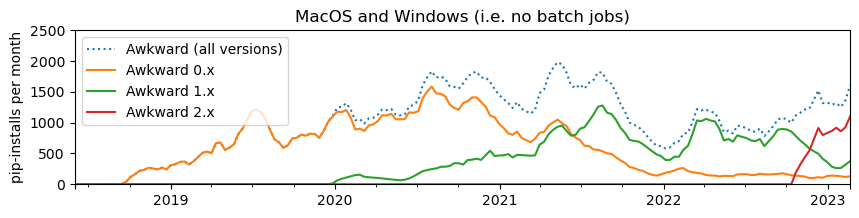

In [49]:
ax = all_packages[[
    "Awkward (all versions)", "Awkward 0.x", "Awkward 1.x", "Awkward 2.x"
]].rolling(6).mean().plot(logy=False, style=[":", "-", "-", "-"], figsize=(10, 2))
ax.set_ylim(0, 2500)
ax.set_xlim(pd.to_datetime("2018-06-01"), all_packages.index[-5])
ax.legend(loc="upper left")
ax.set_xlabel("")
ax.set_ylabel("pip-installs per month")
ax.set_title("MacOS and Windows (i.e. no batch jobs)")
ax.get_figure().savefig("/tmp/pip-macwin-awkward-lin.svg")